In [1]:
###: Loading H2O Library

In [2]:
import h2o

In [3]:
###: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
###: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 21 hours 14 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.834 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing both training and test dataset into H2O cluster memory

In [8]:
#train_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_train.csv")
#test_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_test.csv")

train_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_train.csv")
test_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Training dataset

In [10]:
train_df.describe()

Rows:407
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00906,0.0,0.46,0.0,0.385,3.863,2.9,1.1296,1.0,188.0,12.6,0.32,1.73,5.0
mean,3.56736771499,10.5872235872,11.4092628993,0.0687960687961,0.556763882064,6.28658230958,69.3889434889,3.71767051597,9.83783783784,412.378378378,18.4474201474,354.403218673,12.792039312,22.6248157248
maxs,73.5341,100.0,27.74,1.0,0.871,8.725,100.0,10.7103,24.0,711.0,22.0,396.9,37.97,50.0
sigma,7.94798961655,22.2597824603,6.8144822924,0.253418548596,0.115557348898,0.690897322921,27.8179045475,2.01524090631,8.78440418525,170.44740987,2.16176742548,94.175205015,7.09869539936,9.18501930903
zeros,0,301,0,379,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [11]:
###: Understanding Test dataset

In [12]:
test_df.describe()

Rows:99
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00632,0.0,0.74,0.0,0.389,3.561,9.9,1.1781,1.0,187.0,12.6,6.68,2.88,5.6
mean,3.80327535354,14.5555555556,10.0165656566,0.0707070707071,0.54618989899,6.27662626263,65.2282828283,4.11312828283,8.36363636364,391.212121212,18.4888888889,366.00959596,12.0817171717,22.1545454545
maxs,88.9762,95.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,34.41,50.0
sigma,10.9318629744,27.154498339,6.96902859181,0.257639411539,0.11739221152,0.752520981955,29.378799938,2.42831711324,8.3206830389,160.149373687,2.18869492793,78.0843033028,7.32150592857,9.28388193709
zeros,0,71,0,92,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
2,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.9,18.72,15.2


In [13]:
###: Training and test dataset - columns and rows details

In [14]:
print(train_df.shape)
print(test_df.shape)

(407, 14)
(99, 14)


In [15]:
###: Training and Test Dataframes - columns names

In [16]:
print(train_df.col_names)
print(test_df.col_names)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']
[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [17]:
###: Settings response or target variable for supervised machine learning

In [18]:
response = "medv"
features = train_df.col_names
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [19]:
###: Creating a list of all features we will use for machine learning

In [20]:
features.remove(response)
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat']


In [21]:
###: Understanding response variable values as historgram in Training data

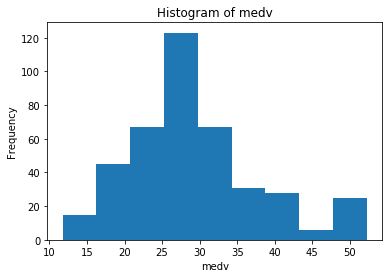

In [22]:
train_df['medv'].hist()

In [23]:
###: Importing H2O H2OGeneralizedLinearEstimator to build GLM Model

In [24]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [25]:
###:Building Gradient Boosting (GBM) -  Regression model with cross validation

In [26]:
gbm_model_with_cv = H2OGradientBoostingEstimator(nfolds=5)
gbm_model_with_cv.train(x = features, y = response, training_frame=train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [27]:
gbm_model_with_cv.model_performance(valid=True,test_data=test_df).r2()

0.8132922698656587

In [28]:
###:Building Gradient Boosting (GBM) -  Regression model with training and validation data now
###:  Setting key GBM parameters

In [29]:
gbm_model_cv_config = H2OGradientBoostingEstimator(distribution="AUTO",
                                      ntrees=10,
                                      max_depth=3,
                                      min_rows=2,
                                      learn_rate=0.2,
                                      nfolds=5,
                                      keep_cross_validation_predictions=True,
                                      seed=1)

In [72]:
###: Training the GBM model

In [73]:
gbm_model_cv_config.train(x = features, y = response, 
                                            training_frame=train_df, 
                                           model_id = "glm_model_with_training_and_validtion_python")

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [75]:
###: Getting model performance based on test data

In [76]:
gbm_model_cv_config.model_performance(valid=True,test_data=test_df).r2()

0.7846159076427028

In [77]:
###: Importing H2O Grid Search Library

In [78]:
from h2o.grid import H2OGridSearch

In [79]:
###: Setting GBM specific Parameters

In [80]:
gbm_hyper_params = {"learn_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
                "max_depth": [ 5, 7, 10],
                "sample_rate": [0.5, 0.75, 1.0],
                "col_sample_rate": [0.5, 0.6, 0.7, 0.8]}

In [81]:
###: Setting GBM hyperparameter search criteria

In [42]:
grid_search_criteria = {"strategy": "RandomDiscrete", 
                        "max_models": 100, 
                        "seed": 12345}

In [82]:
###: Finalizing the settings for GBM grid search

In [83]:
house_price_gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(ntrees=50,
                                                        seed=1,
                                                        nfolds=5,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                     hyper_params=gbm_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="house_price_gbm_grid")

In [85]:
###: Finally traning the GBM grid Search Model

In [84]:
house_price_gbm_grid.train(x=features, y=response, training_frame=train_df)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [87]:
###: Getting the tital number of models built into H2O GBM Grid

In [88]:
len(house_price_gbm_grid)

100

In [89]:
###: Definiting a function to find the best model from the grid based on r2 or auc

In [109]:
def find_best_model_from_grid(h2o_grid, test_parameter):    
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)            
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)            
    #print(model_list)        
    max_index = model_list.index(max(model_list))
    #print(max_index)
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " +  best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " +  str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " +  str(best_model.auc()))
    return best_model

In [110]:
###: Applying the function to get the best model from the grid

In [91]:
best_gbm_model = find_best_model_from_grid(house_price_gbm_grid, "r2")

Model ID with best R2: house_price_gbm_grid_model_95
Best R2: 0.999984569386


In [ ]:
###: Performing predictions with one of the above model

In [97]:
gbm_predictions = best_gbm_model.predict(test_data=test_df)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [98]:
###: Understanding/Validating predictions based on prediction results historgram

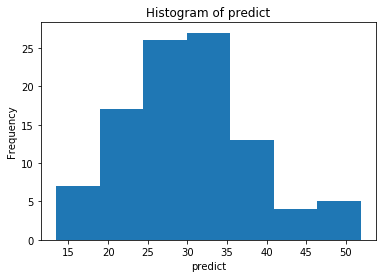

In [99]:
gbm_predictions.hist()

In [ ]:
#: Getting Scorring History

In [101]:
best_gbm_model.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2017-11-22 16:37:22,37.343 sec,0.0,9.173729,6.662434,84.157296
1,,2017-11-22 16:37:22,37.346 sec,1.0,3.271914,2.139589,10.705422
2,,2017-11-22 16:37:22,37.348 sec,2.0,2.682784,1.814275,7.197329
3,,2017-11-22 16:37:22,37.350 sec,3.0,2.173591,1.531212,4.724497
4,,2017-11-22 16:37:22,37.352 sec,4.0,1.882826,1.340570,3.545035
5,,2017-11-22 16:37:22,37.354 sec,5.0,1.659908,1.192878,2.755293
6,,2017-11-22 16:37:22,37.357 sec,6.0,1.439769,1.078829,2.072936
7,,2017-11-22 16:37:22,37.359 sec,7.0,1.301605,0.984973,1.694175
8,,2017-11-22 16:37:22,37.361 sec,8.0,1.161976,0.889768,1.350188
9,,2017-11-22 16:37:22,37.372 sec,9.0,1.074837,0.824060,1.155275


In [ ]:
#: Getting GBM model variable importance 

In [102]:
best_gbm_model.varimp()

[(u'rm', 18156.662109375, 1.0, 0.5300492745520524),
 (u'lstat', 9181.12890625, 0.5056617152945431, 0.2680256253606191),
 (u'dis', 2218.64697265625, 0.12219465005688877, 0.0647691856167958),
 (u'nox', 1821.20068359375, 0.10030481773703286, 0.05316649587559011),
 (u'ptratio', 1000.8920288085938, 0.05512533211111495, 0.02921914229493744),
 (u'age', 727.6627197265625, 0.0400768993410326, 0.02124273142200996),
 (u'b', 423.8000793457031, 0.02334129901150049, 0.012372038608148374),
 (u'crim', 343.65740966796875, 0.01892734510328993, 0.01003242554119517),
 (u'indus', 125.0502700805664, 0.006887294004110922, 0.003650605190505695),
 (u'rad', 121.13451385498047, 0.006671629021087194, 0.003536292122707687),
 (u'tax', 109.11882019042969, 0.006009850243018366, 0.0031855167614783606),
 (u'zn', 25.658967971801758, 0.0014131985172843539, 0.0007490648488846079),
 (u'chas', 0.05486930161714554, 3.021992769740114e-06, 1.6018050753022952e-06)]

In [ ]:
#: Getting GBM model variable importance PLOT

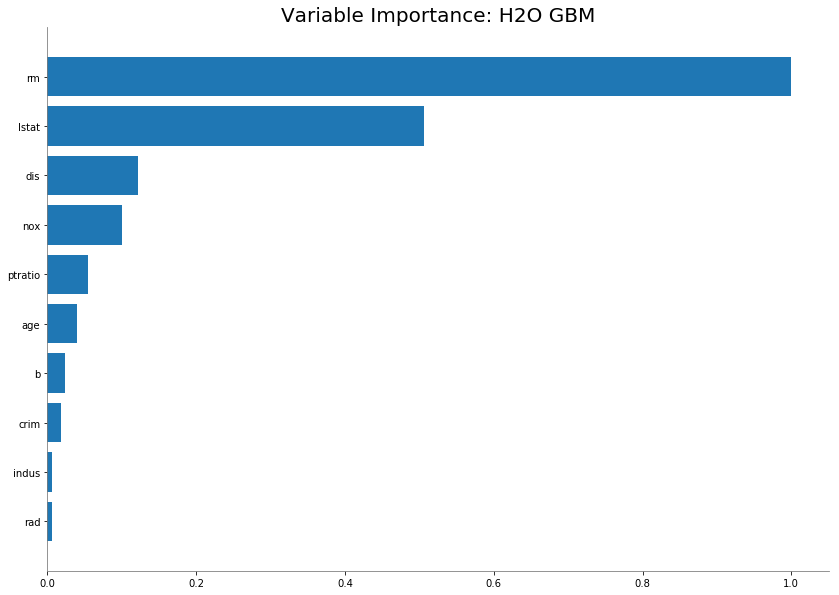

In [103]:
best_gbm_model.varimp_plot()

In [108]:
###: Plotting the model based on rmse

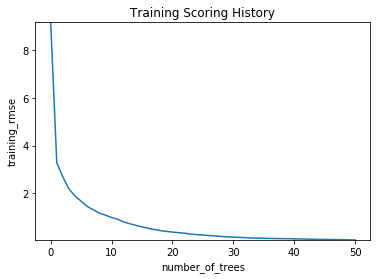

In [107]:
best_gbm_model.plot(metric="rmse")